In [ ]:
#Cargar archivo
from google.colab import files
files.upload()

Saving cancer.csv to cancer (2).csv


{'cancer.csv': b'\xef\xbb\xbfid,espesor,tama\xc3\xb1o_celda,forma_celda,adhesion,tam_celula,nuc_desnudos,cromatina_suave,nuc_normales,mitosis,tipo_cancer\r\n1000025,5,1,1,1,2,1,3,1,1,2\r\n1002945,5,4,4,5,7,10,3,2,1,2\r\n1015425,3,1,1,1,2,2,3,1,1,2\r\n1016277,6,8,8,1,3,4,3,7,1,2\r\n1017023,4,1,1,3,2,1,3,1,1,2\r\n1017122,8,10,10,8,7,10,9,7,1,4\r\n1018099,1,1,1,1,2,10,3,1,1,2\r\n1018561,2,1,2,1,2,1,3,1,1,2\r\n1033078,2,1,1,1,2,1,1,1,5,2\r\n1033078,4,2,1,1,2,1,2,1,1,2\r\n1035283,1,1,1,1,1,1,3,1,1,2\r\n1036172,2,1,1,1,2,1,2,1,1,2\r\n1041801,5,3,3,3,2,3,4,4,1,4\r\n1043999,1,1,1,1,2,3,3,1,1,2\r\n1044572,8,7,5,10,7,9,5,5,4,4\r\n1047630,7,4,6,4,6,1,4,3,1,4\r\n1048672,4,1,1,1,2,1,2,1,1,2\r\n1049815,4,1,1,1,2,1,3,1,1,2\r\n1050670,10,7,7,6,4,10,4,1,2,4\r\n1050718,6,1,1,1,2,1,3,1,1,2\r\n1054590,7,3,2,10,5,10,5,4,4,4\r\n1054593,10,5,5,3,6,7,7,10,1,4\r\n1056784,3,1,1,1,2,1,2,1,1,2\r\n1057013,8,4,5,1,2,?,7,3,1,4\r\n1059552,1,1,1,1,2,1,3,1,1,2\r\n1065726,5,2,3,4,2,7,3,6,1,4\r\n1066373,3,2,1,1,1,1,2,1,1

In [ ]:
#importar librerías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:
#leer el archivo csv
df = pd.read_csv("cancer (1).csv")

In [ ]:
#Extracción de información del dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   espesor          699 non-null    int64 
 2   tamaño_celda     699 non-null    int64 
 3   forma_celda      699 non-null    int64 
 4   adhesion         699 non-null    int64 
 5   tam_celula       699 non-null    int64 
 6   nuc_desnudos     699 non-null    object
 7   cromatina_suave  699 non-null    int64 
 8   nuc_normales     699 non-null    int64 
 9   mitosis          699 non-null    int64 
 10  tipo_cancer      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


,id,espesor,tamaño_celda,forma_celda,adhesion,tam_celula,cromatina_suave,nuc_normales,mitosis,tipo_cancer
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
#verificar por qué compacidad es un objeto en vez de un entero

for i in df['nuc_desnudos']:
  try:
    x = int(i)
  except:
    print(i)


?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?


In [ ]:
#modificar los signos de interrogación por la media del valor

#hallar media
media = 0
count = 0
for i in df['nuc_desnudos']:
  try:
    media += int(i)
    count+=1
  except:
    pass

media = round(media/count)

#cambiar los signos de interrogación
for pos in range(len(df['nuc_desnudos'])):
  if (df['nuc_desnudos'][pos] == '?'):
    df['nuc_desnudos'][pos] = media

#modificar el tipo de dato de compacidad
df['nuc_desnudos'] = pd.to_numeric(df['nuc_desnudos'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               699 non-null    int64
 1   espesor          699 non-null    int64
 2   tamaño_celda     699 non-null    int64
 3   forma_celda      699 non-null    int64
 4   adhesion         699 non-null    int64
 5   tam_celula       699 non-null    int64
 6   nuc_desnudos     699 non-null    int64
 7   cromatina_suave  699 non-null    int64
 8   nuc_normales     699 non-null    int64
 9   mitosis          699 non-null    int64
 10  tipo_cancer      699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#cambiar de dataframe a lista
cancerList = df.values.tolist()

In [ ]:
# Crear el modelo con 2 clusters
kmeans = KMeans(n_clusters=2)

# entrenar el modelo con el dataset y definir las etiquetas generadas
etiquetas = model.fit_predict(cancerList)

# Create a DataFrame with labels and varieties as columns: df
clustering = pd.DataFrame({'etiquetas': etiquetas, 'tiposCancer': df['tipo_cancer']})

# Comprobar eficiencia del modelo
ct = pd.crosstab(clustering['etiquetas'], clustering['tiposCancer'])

ct

tiposCancer,2,4
etiquetas,,
0,456,241
1,2,0


In [ ]:
# Crear un Scaler
scaler = StandardScaler()

# Crear el modelo con 2 clusters
kmeans = KMeans(n_clusters=2)

# Crear pipeline con el scaler y el modelo
pipeline = make_pipeline(scaler,kmeans)

# entrenar el modelo con el dataset
pipeline.fit(cancerList)

# generar las etiquetas con base a los datos en los que se agruparán
etiquetas2 = pipeline.predict(cancerList)

# Crear el dataframe que contiene la combinación entre las etiquetas generadas y en las que realmente pertenece
clustering2 = pd.DataFrame({'etiquetas': etiquetas2, 'tiposCancer': df['tipo_cancer']})

# Comprobar eficiencia del modelo
ct = pd.crosstab(clustering2['etiquetas'], clustering2['tiposCancer'])

ct

tiposCancer,2,4
etiquetas,,
0,449,8
1,9,233


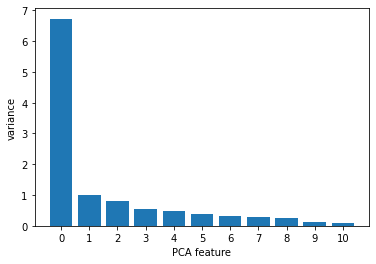

In [ ]:
#reducir la dimensionalidad

#crear el objeto PCA (Principal Component Analysis)
pca = PCA()

# Crear el oobjeto pipeline
pipeline2 = make_pipeline(scaler, pca)

# Entrenar el modelo
pipeline2.fit(cancerList)

# Crear diagrama de la cantidad de variables necesarias
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

k = 2  # número de atributos a seleccionar
entrenar = df.drop(['tipo_cancer'], axis=1)
columnas = list(entrenar.columns.values)
seleccionadas = SelectKBest(f_classif, k=k).fit(entrenar, df["tipo_cancer"])
atrib = seleccionadas.get_support()
atributos = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos

['tamaño_celda', 'forma_celda']

In [ ]:
df

,id,espesor,tamaño_celda,forma_celda,adhesion,tam_celula,nuc_desnudos,cromatina_suave,nuc_normales,mitosis,tipo_cancer
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
cancerCopy = df.copy()
del cancerCopy["id"]
del cancerCopy["espesor"]
del cancerCopy["adhesion"]
del cancerCopy["tam_celula"]
del cancerCopy["nuc_desnudos"]
del cancerCopy["cromatina_suave"]
del cancerCopy["nuc_normales"]
del cancerCopy["mitosis"]

cancerListCopy = cancerCopy.values.tolist()

In [ ]:
# Crear un Scaler
scaler = StandardScaler()

# Crear el modelo con 2 clusters
kmeans = KMeans(n_clusters=2)

# Crear pipeline con el scaler y el modelo
pipelinee = make_pipeline(scaler,kmeans)

# entrenar el modelo con el dataset
pipelinee.fit(cancerListCopy)

# generar las etiquetas con base a los datos en los que se agruparán
etiquetas3 = pipelinee.predict(cancerListCopy)

# Crear el dataframe que contiene la combinación entre las etiquetas generadas y en las que realmente pertenece
clustering3 = pd.DataFrame({'etiquetas': etiquetas3, 'tiposCancer': cancerCopy['tipo_cancer']})

# Comprobar eficiencia del modelo
ct = pd.crosstab(clustering3['etiquetas'], clustering3['tiposCancer'])

print(ct)
print(cancerCopy.shape)

tiposCancer    2    4
etiquetas            
0            454    5
1              4  236
(699, 3)
